In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
tdata=pd.read_csv('titanic_train.csv')
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#missing data
tdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

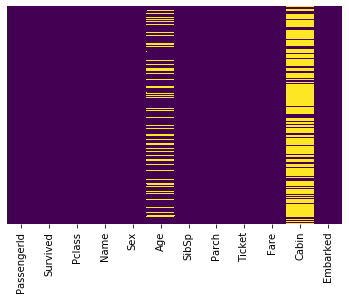

In [4]:
sns.heatmap(tdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#datavisualization using matplotlib and seaborn

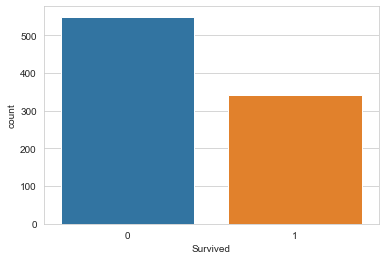

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=tdata)

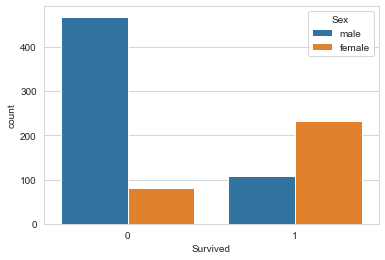

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=tdata)

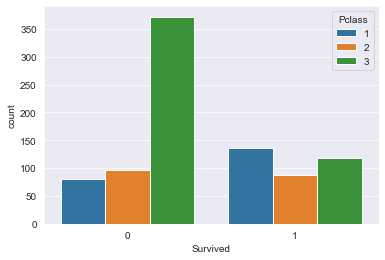

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=tdata)

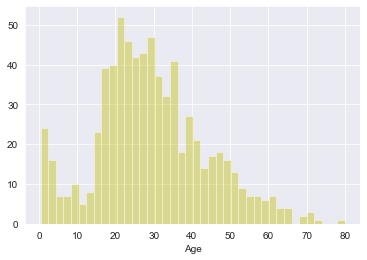

In [9]:
sns.distplot(tdata['Age'].dropna(),kde=False,bins=40,color="y")

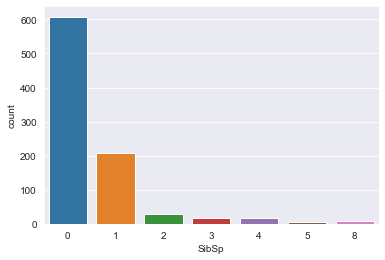

In [10]:
sns.countplot(x='SibSp',data=tdata)

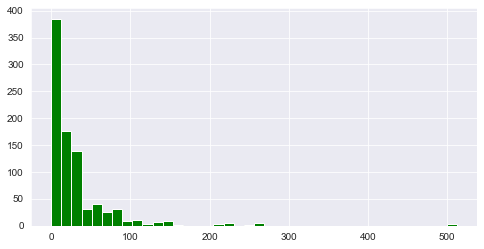

In [11]:
tdata['Fare'].hist(color='green',figsize=(8,4),bins=40)

DATA-CLEANING

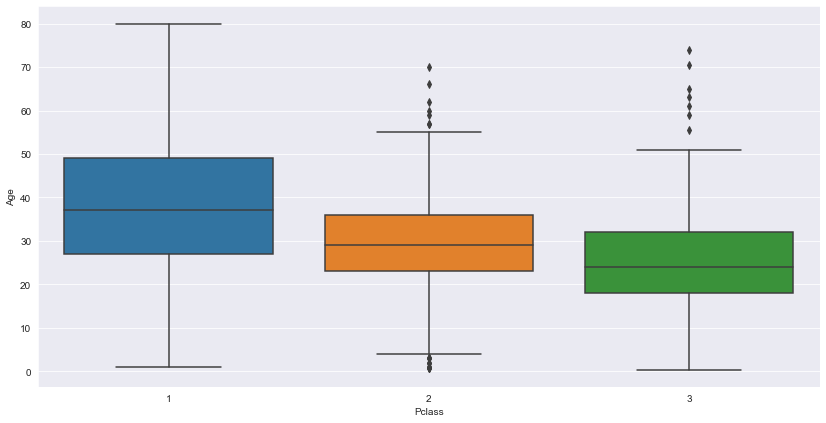

In [12]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Pclass',y='Age',data=tdata)

In [13]:
def impute_age(cols):
    Age= cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        
        

In [14]:
tdata['Age']=tdata[['Age','Pclass']].apply(impute_age,axis=1)

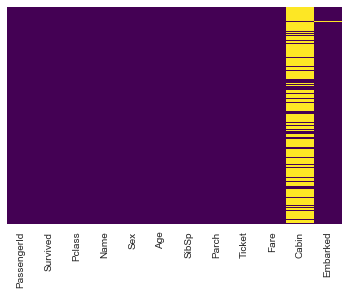

In [15]:
sns.heatmap(tdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
tdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
tdata.drop('Cabin',axis=1,inplace=True)

In [18]:
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


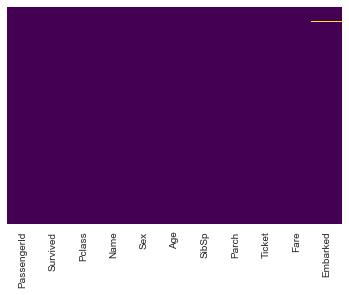

In [19]:
sns.heatmap(tdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
tdata["Embarked"].fillna( method ='ffill', inplace = True)
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


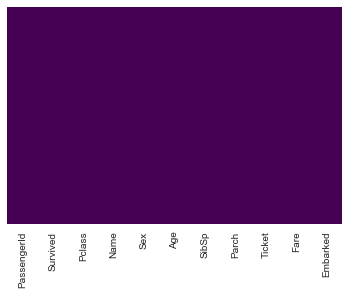

In [21]:
sns.heatmap(tdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
sex = pd.get_dummies(tdata['Sex'],drop_first=True)
embark = pd.get_dummies(tdata['Embarked'],drop_first=True)

In [23]:
tdata.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
tdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
tdata = pd.concat([tdata,sex,embark],axis=1)

In [26]:
tdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
tdata.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [28]:
tdata['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

F:\jpython\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\jpython\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


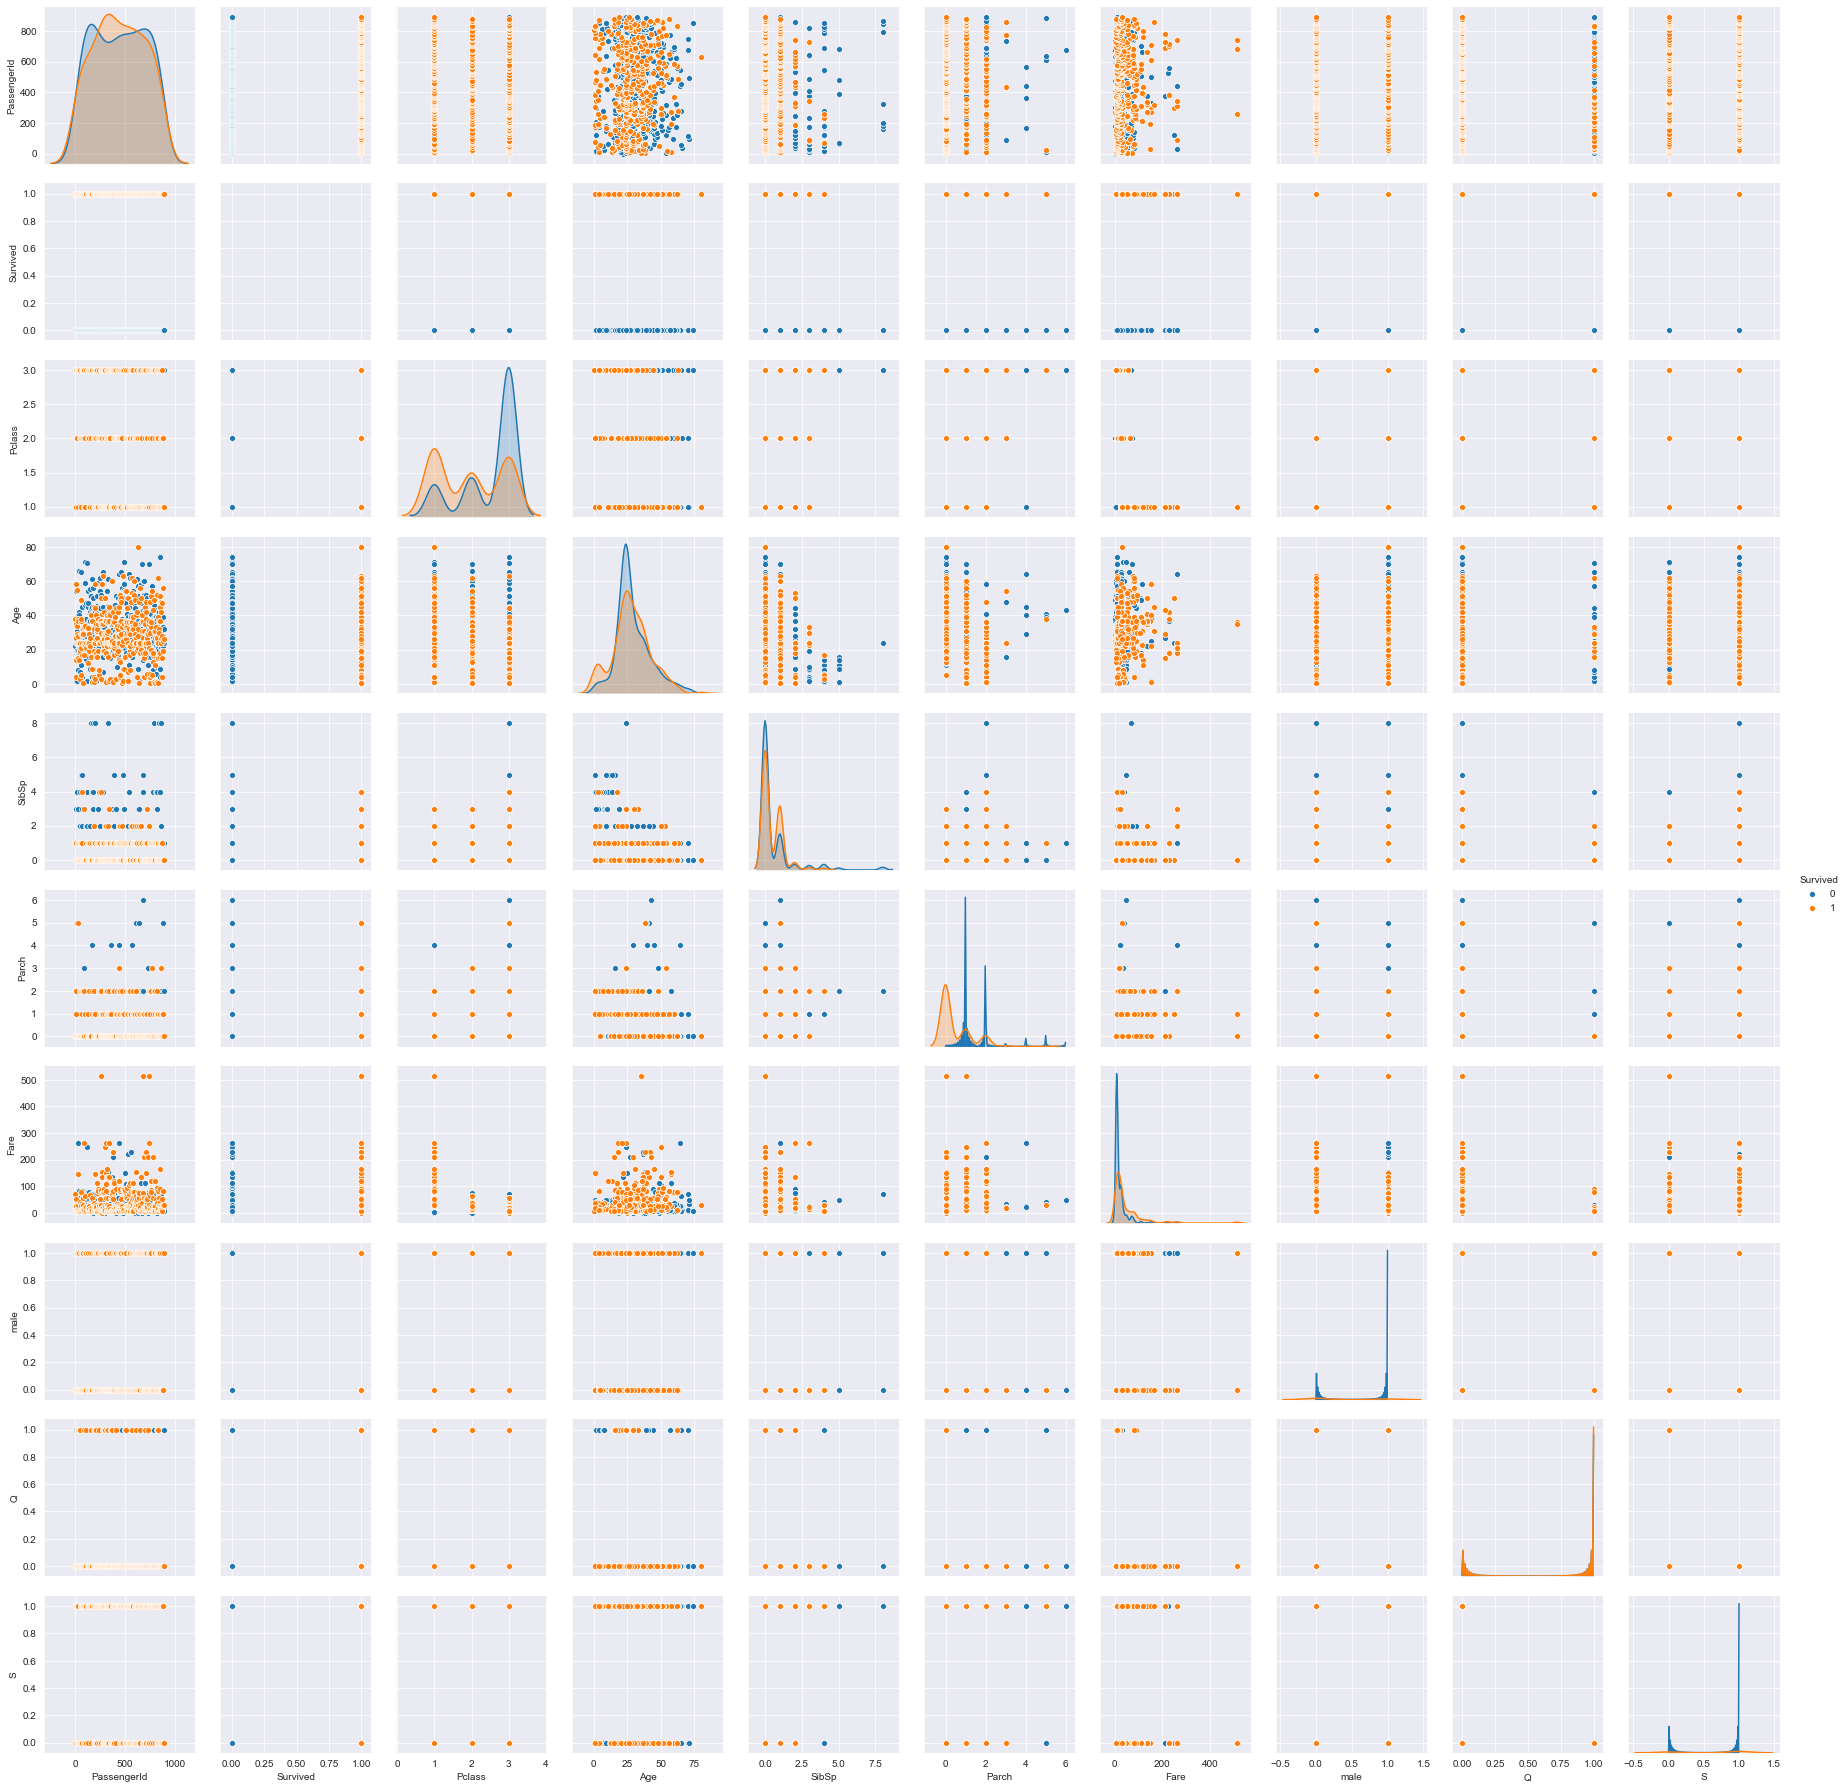

In [29]:
sns.pairplot(tdata,hue='Survived')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(tdata.drop('Survived',axis=1),tdata['Survived'],test_size=0.30,random_state=101)

In [32]:
# from sklearn.linear_model import LogisticRegression

In [33]:
# logmodel = LogisticRegression()
# logmodel.fit(x_train,y_train)

In [34]:
# predictions = logmodel.predict(x_test)

In [35]:
# from sklearn.metrics import confusion_matrix

In [36]:
# accuracy=confusion_matrix(y_test,predictions)

In [37]:

# accuracy

In [38]:
# from sklearn.metrics import accuracy_score

In [39]:
# accuracy=accuracy_score(y_test,predictions)
# accuracy

In [40]:

# predictions

In [41]:
# from sklearn.metrics import classification_report

In [42]:
# print(classification_report(y_test,predictions))

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [45]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
predictions = dtree.predict(x_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [49]:
conf_matrix,accuracy

(array([[125,  29],
        [ 35,  79]], dtype=int64), 0.7611940298507462)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       154
           1       0.73      0.69      0.71       114

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [51]:
print(confusion_matrix(y_test,predictions))

[[125  29]
 [ 35  79]]


In [52]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(tdata.columns[1:])
features

F:\jpython\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

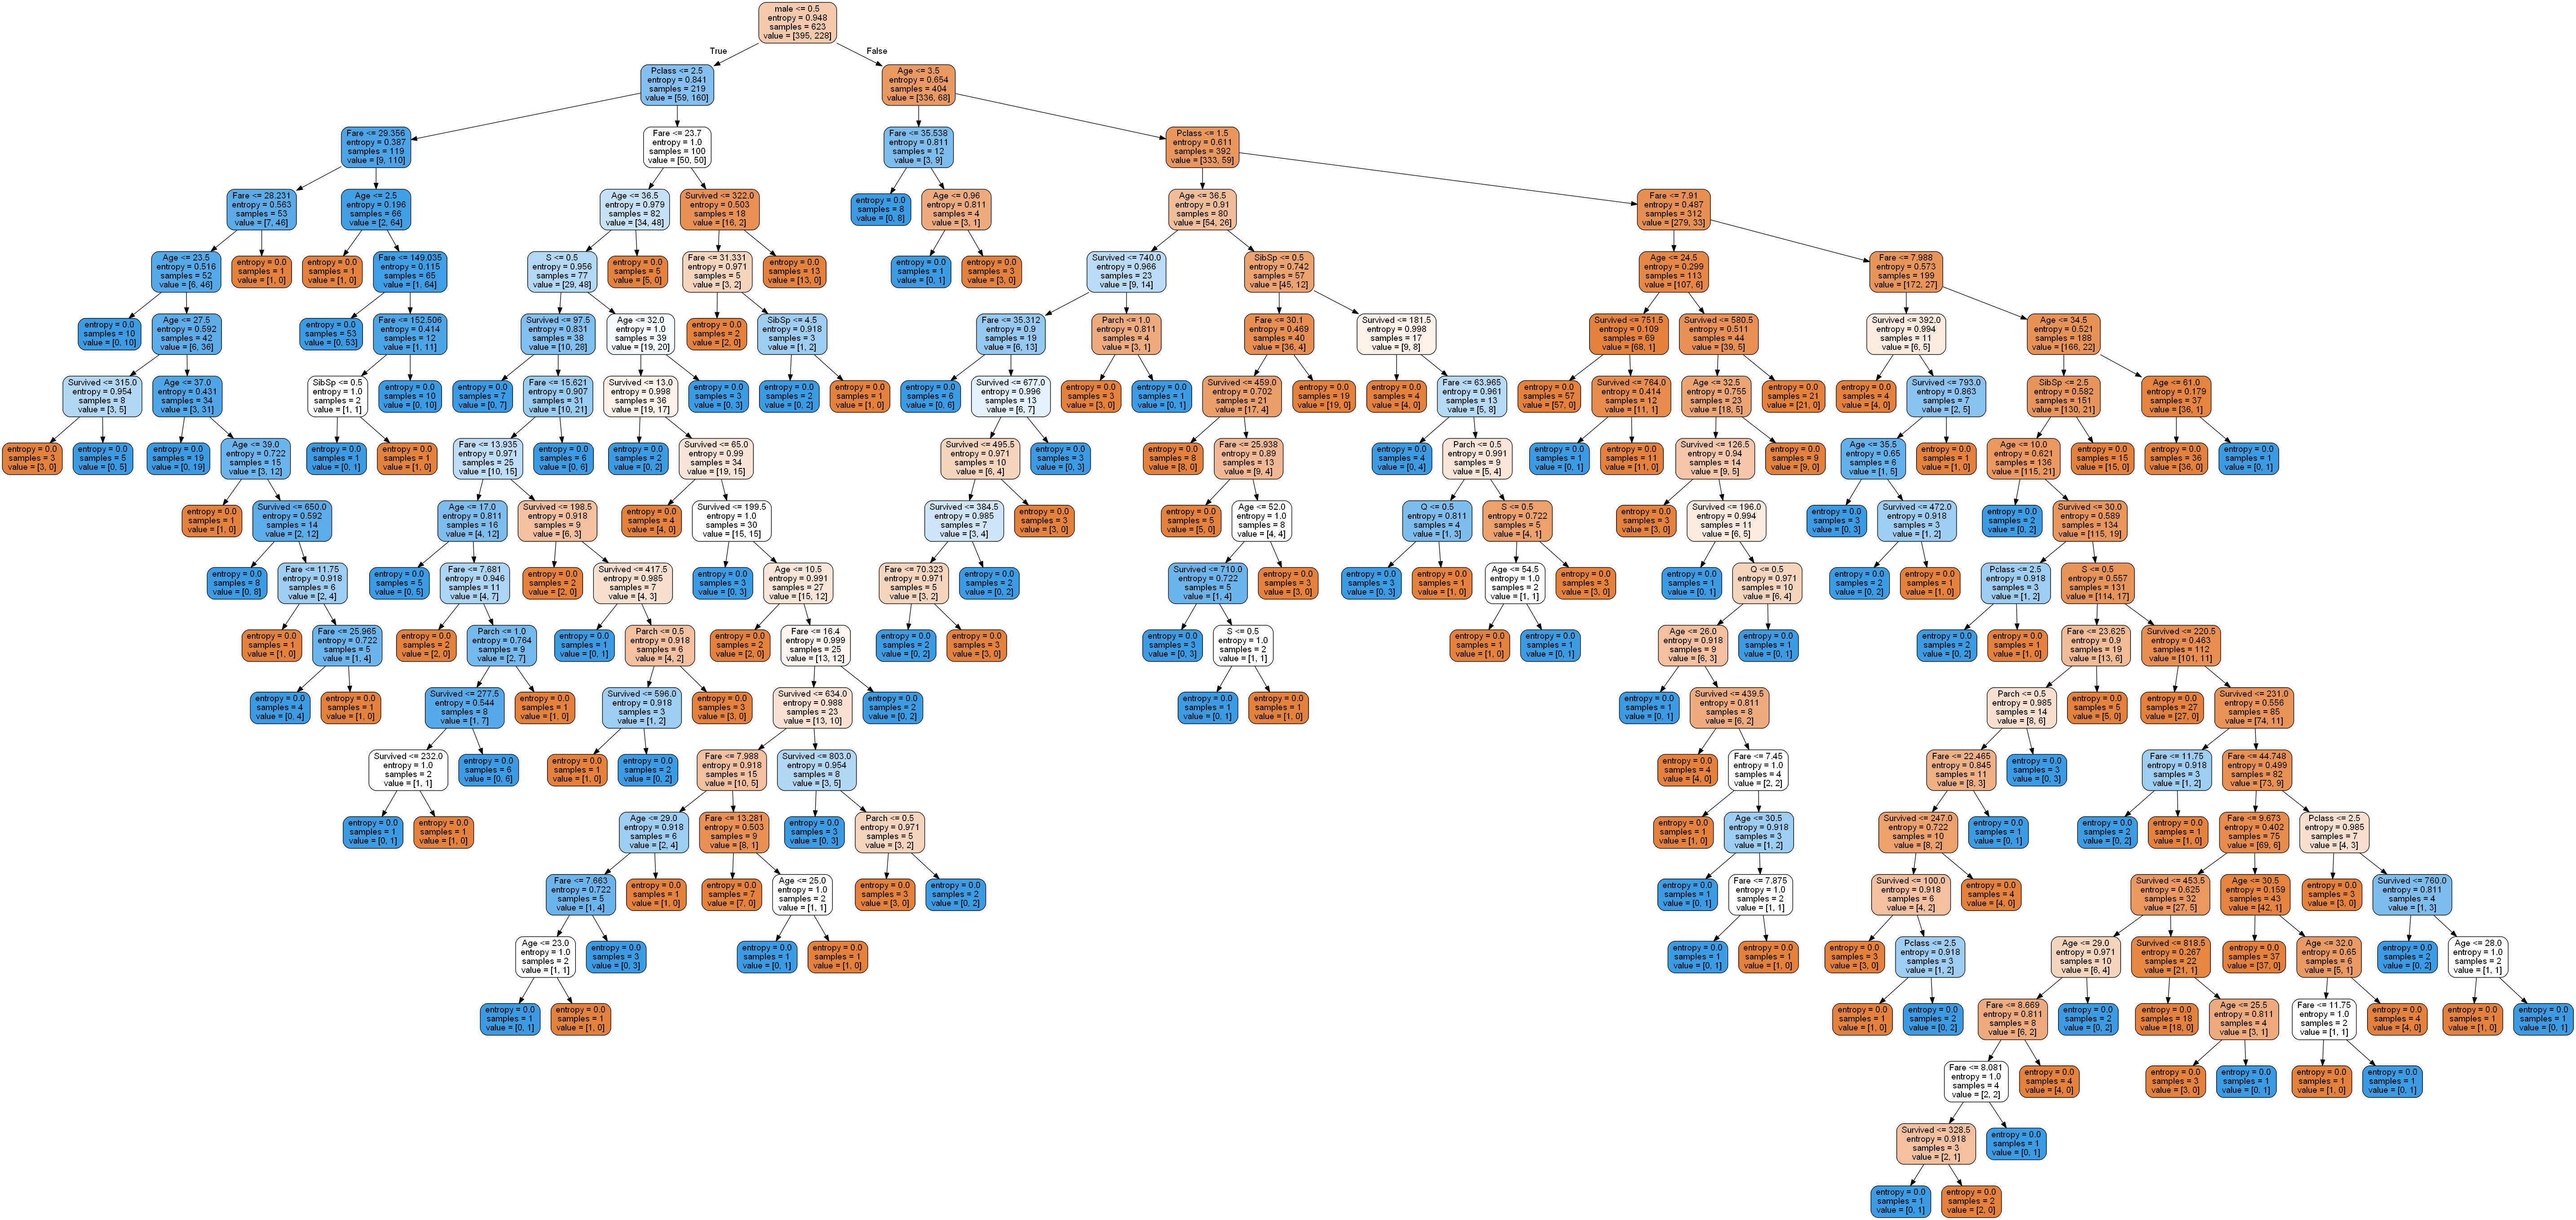

In [53]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [54]:
graph[0].write_pdf("titanictree.pdf") 

In [55]:
graph[0].write_png("titanictree.png") 